In [ ]:
import pandas as pd

#Leer el archivo que contiene el dataset e imprimir su contenido
df = pd.read_csv("framingham.csv")
df

#Ejemplo 1 - Clasificar cada uno de los pacientes por sexo

In [ ]:
# Obtener la cantidad de pacientes por sexo
hombres = df[df["male"] == 1].shape[0]
mujeres = df[df["male"] == 0].shape[0]

# Imprimir la información de acuerdo el filtro anterior
print("Cantidad de hombres:", hombres)
print("Cantidad de mujeres:", mujeres)

#Ejemplo 2 - Calcular la media de edad de cada uno de los pacientes con el metodo mean()

In [ ]:
edad_promedio = df["age"].mean()

#Imprimir el resultado
print("Promedio de edad:", edad_promedio)

#Ejemplo 3 - Calcular la permanencia de diabetes en los pacientes 

In [ ]:
# Obtener la cantidad de pacientes con diabetes
cantidad_diabetes = df[df["diabetes"] == 1].shape[0]

#Calcular 
permanencia = cantidad_diabetes / df.shape[0]

#Imprimir el resultado
print("Permanencia de diabetes:", permanencia)

#Implementacion de la regresión logistica

c:\Users\Erick\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Erick\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Erick\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Precisión: 0.9130434782608695
Clasificación:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.00      0.00      0.00         2

    accuracy                           0.91        23
   macro avg       0.46      0.50      0.48        23
weighted avg       0.83      0.91      0.87        23



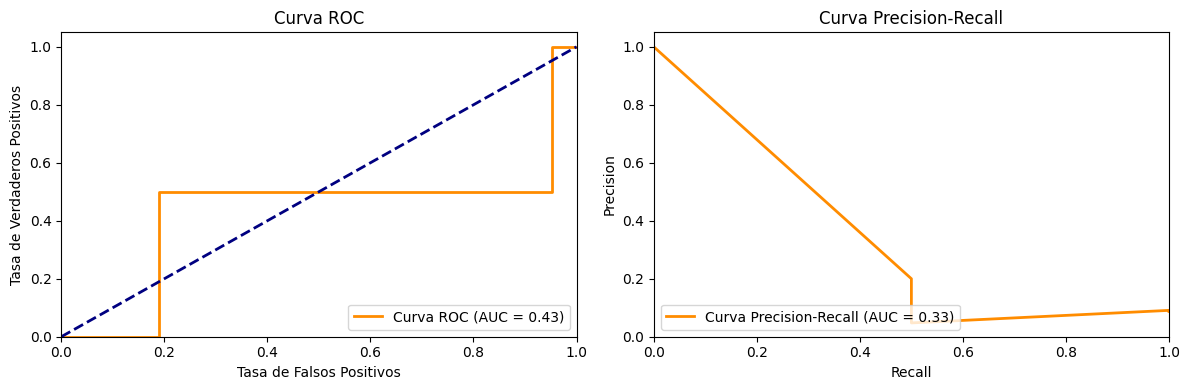

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos desde el archivo CSV
data = pd.read_csv('framingham.csv')

# Separar las características (X) y la variable objetivo (y)
X = data.drop('TenYearCHD', axis=1)
y = data['TenYearCHD']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Precisión: {accuracy}')
print('Clasificación:\n', classification_rep)

# Calcula la probabilidad de las predicciones
y_prob = model.predict_proba(X_test)[:, 1]

# Calcula la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcula la curva Precision-Recall con manejo de warning
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Asegúrate de que no haya divisiones por cero
precision = np.where(precision == 0.0, 1.0, precision)
pr_auc = auc(recall, precision)

# Dibuja las curvas ROC y Precision-Recall
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2, label='Curva Precision-Recall (AUC = {:.2f})'.format(pr_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


